In [ ]:
# update lamindb and bionty...

In [1]:
! lamin load scprint

→ connected lamindb: jkobject/scprint


In [2]:
! lamin migrate deploy

Operations to perform:
  Apply all migrations: bionty, lnschema_core
Running pre-migrate handlers for application lnschema_core
Running pre-migrate handlers for application bionty
Running migrations:
  Applying lnschema_core.0065_remove_collection_feature_sets_and_more... OK (1.386s)
  Applying lnschema_core.0066_alter_artifact__feature_values_and_more... OK (3.067s)
  Applying bionty.0038_alter_artifactcellline_created_by_and_more... OK (4.517s)
  Applying bionty.0039_alter_cellline_source_alter_cellmarker_source_and_more... OK (1.847s)
Running post-migrate handlers for application lnschema_core
Running post-migrate handlers for application bionty


# we will check it works and reset the bionty sources

In [1]:
import lamindb as ln
import bionty as bt
from scdataloader.utils import populate_my_ontology
%load_ext autoreload
%autoreload 2


→ connected lamindb: jkobject/scprint2


In [27]:
len(ln.Artifact.filter())

0

In [2]:
bt.base.reset_sources()

In [3]:
bt.core.sync_all_sources_to_latest()

! please reload your instance to reflect the updates!


# load them in my personnal ontology

In [2]:
# delete all old artifacts
bt.Tissue.artifacts.through.objects.all().delete()
bt.Tissue.filter().delete()
bt.Disease.artifacts.through.objects.all().delete()
bt.Disease.filter().delete()
bt.CellType.artifacts.through.objects.all().delete()
bt.CellType.filter().delete()
bt.ExperimentalFactor.artifacts.through.objects.all().delete()
bt.ExperimentalFactor.filter().delete()
bt.Ethnicity.artifacts.through.objects.all().delete()
bt.Ethnicity.filter().delete()
bt.DevelopmentalStage.artifacts.through.objects.all().delete()
bt.DevelopmentalStage.filter().delete()

In [3]:
# more straightforward
populate_my_ontology(organisms=["NCBITaxon:9544", "NCBITaxon:9483", "NCBITaxon:10090", "NCBITaxon:9606"])

! ambiguous validation in Bionty for 1 record: 'NCBITaxon:10090'
! record with similar name exists! did you mean to load it?


,uid,name,ontology_id,abbr,synonyms,description,molecule,instrument,measurement,source_id,run_id,created_at,created_by_id
id,,,,,,,,,,,,,
3150,63btPuBB,fever of unknown origin,EFO:0003952,None,Unknown Origin Fevers|Unknown Origin Fever,Fever In Which The Etiology Cannot Be Ascertai...,None,None,None,65,None,2024-11-25 10:55:05.342824+00:00,1


→ returning existing DevelopmentalStage record with same name: 'unknown'
! records with similar names exist! did you mean to load one of them?


,uid,name,ontology_id,abbr,synonyms,description,source_id,run_id,created_at,created_by_id
id,,,,,,,,,,
839,7CKxLDlu,obsolete congenital abnormality,MONDO:0000839,None,congenital abnormality|congenital anatomic Abn...,"Obsolete. Any Abnormality, Anatomical Or Bioch...",49,None,2024-11-25 10:55:17.283811+00:00,1
881,5pHdg2Ic,obsolete myeloid and lymphoid neoplasms with e...,MONDO:0000881,None,None,None,49,None,2024-11-25 10:55:17.284776+00:00,1
884,5lzQM8ub,myeloid and lymphoid neoplasms associated with...,MONDO:0000884,None,None,None,49,None,2024-11-25 10:55:17.284845+00:00,1


! records with similar names exist! did you mean to load one of them?


,uid,name,ontology_id,abbr,synonyms,description,source_id,run_id,created_at,created_by_id
id,,,,,,,,,,
7705,1wpjcCa5,hemoglobin--variants for which the chain carry...,MONDO:0007717,None,None,None,49,None,2024-11-25 10:55:17.659748+00:00,1
16575,2C05jMg9,sporadic adult-onset ataxia of unknown etiology,MONDO:0016591,None,SAOA|idiopathic late-onset cerebellar ataxia,Sporadic Adult-Onset Ataxia Of Unknown Etiolog...,49,None,2024-11-25 10:55:18.217500+00:00,1
16688,4sqESY3D,obsolete glial tumor of neuroepithelial tissue...,MONDO:0016704,None,None,None,49,None,2024-11-25 10:55:18.221835+00:00,1


In [2]:
list(bt.Disease.filter(ontology_id="MONDO:0000005").one().parents.filter())

[Disease(uid='4oYaDnBG', name='alopecia', ontology_id='MONDO:0004907', synonyms='alopecia|hair loss|loss Of hair', description='Hair Loss Usually From The Scalp. It May Result In Bald Spots Or Spread To The Entire Scalp Or The Entire Epidermis. It May Be Androgenetic Or Caused By Chemotherapeutic Agents, Compulsive Hair Pulling, Autoimmune Disorders Or Congenital Conditions.', created_by_id=1, source_id=49, created_at=2024-11-25 10:55:17 UTC),
 Disease(uid='1KQgvwK8', name='hereditary skin disorder', ontology_id='MONDO:0100118', synonyms='genodermatosis|diseases, genetic skin|skin disease, genetic|genetic skin diseases|disease, genetic skin|genetic skin disease', description='An Instance Of Skin Disease That Is Caused By A Modification Of The Individual'S Genome.', created_by_id=1, source_id=49, created_at=2024-11-25 10:55:18 UTC)]

In [23]:
bt.Disease.public().df().loc["MONDO:0000005"].parents

array(['MONDO:0100118', 'MONDO:0004907'], dtype=object)

# load the latest datasets / load datasets that were initially dropped

In [24]:
list(ln.Collection.using(instance="laminlabs/cellxgene").filter(name="cellxgene-census").all())

[Collection(uid='dMyEX3NTfKOEYXyMu591', version='2023-12-15', is_latest=False, name='cellxgene-census', hash='0NB32iVKG5ttaW5XILvG', visibility=1, created_by_id=1, transform_id=19, run_id=24, updated_at='2024-01-30 09:09:49 UTC'),
 Collection(uid='dMyEX3NTfKOEYXyMKDAQ', version='2023-07-25', is_latest=False, name='cellxgene-census', hash='pEJ9uvIeTLvHkZW2TBT5', visibility=1, created_by_id=1, transform_id=18, run_id=23, updated_at='2024-01-30 09:06:05 UTC'),
 Collection(uid='dMyEX3NTfKOEYXyMKDD7', version='2024-07-01', is_latest=True, name='cellxgene-census', hash='nI8Ag-HANeOpZOz-8CSn', visibility=1, created_by_id=1, transform_id=22, run_id=27, updated_at='2024-07-16 12:24:38 UTC')]

In [2]:
cx_dataset = ln.Collection.using(instance="laminlabs/cellxgene").filter(name="cellxgene-census", version='2024-07-01').one()
cx_dataset, len(cx_dataset.artifacts.all())

! source schema has additional modules: {'ourprojects'}
consider mounting these schema modules to transfer all metadata
! no run & transform got linked, call `ln.track()` & re-run
! run input wasn't tracked, call `ln.track()` and re-run


(Collection(uid='dMyEX3NTfKOEYXyMKDD7', version='2024-07-01', is_latest=True, name='cellxgene-census', hash='nI8Ag-HANeOpZOz-8CSn', visibility=1, created_by_id=1, transform_id=22, run_id=27, created_at=2024-07-16 12:14:38 UTC),
 812)

In [2]:
cx_dataset_2 = ln.Collection.using(instance="laminlabs/cellxgene").filter(name="cellxgene-census", version='2023-12-15').one()
cx_dataset_2, len(cx_dataset_2.artifacts.all())

! renewing expired lamin token: call `lamin login` to avoid this
! no run & transform get linked, consider calling ln.context.track()


(Collection(uid='dMyEX3NTfKOEYXyMu591', version='2023-12-15', is_latest=False, name='cellxgene-census', hash='0NB32iVKG5ttaW5XILvG', visibility=1, created_by_id=1, transform_id=19, run_id=24, updated_at='2024-01-30 09:09:49 UTC'),
 1113)

In [31]:
cx_dataset.artifacts.all()[0].key

! no run & transform get linked, consider calling ln.context.track()


'cell-census/2024-07-01/h5ads/0041b9c3-6a49-4bf7-8514-9bc7190067a7.h5ad'

In [21]:
cx_dataset.artifacts.all()[0].key.split("/")[-1]

! no run & transform get linked, consider calling ln.context.track()


'0041b9c3-6a49-4bf7-8514-9bc7190067a7.h5ad'

In [42]:
len(set([a.key.split("/")[-1] for a in cx_dataset.artifacts.all()]) - set([a.key.split("/")[-1] for a in cx_dataset_2.artifacts.all()]))

! no run & transform get linked, consider calling ln.context.track()
! no run & transform get linked, consider calling ln.context.track()


129

In [23]:
len(set([a.key.split("/")[-1] for a in cx_dataset.artifacts.all()]) & set([a.key.split("/")[-1] for a in cx_dataset_2.artifacts.all()]))

! no run & transform get linked, consider calling ln.context.track()
! no run & transform get linked, consider calling ln.context.track()


683

In [29]:
a = set([a.key.split("/")[-1] for a in cx_dataset_2.artifacts.all()]) - set([a.key.split("/")[-1] for a in cx_dataset.artifacts.all()])
a = list(a)
len(a)

! no run & transform get linked, consider calling ln.context.track()
! no run & transform get linked, consider calling ln.context.track()


430

In [41]:
cx_dataset_2.artifacts.filter(key="cell-census/2023-12-15/h5ads/"+a[20]).one().description

'Joint scRNA-seq and scATAC-seq atlas of the adult human retina'

In [4]:
from scdataloader.preprocess import (
    LaminPreprocessor,
    additional_preprocess,
    additional_postprocess
)
import lamindb as ln
%load_ext autoreload
%autoreload 2

DESCRIPTION='scPRINT-V2 datasets'


do_preprocess = LaminPreprocessor(additional_postprocess=additional_postprocess, additional_preprocess=additional_preprocess, skip_validate=False, n_hvg_for_postp=3000, cache=False, filter_gene_by_counts=False, filter_cell_by_counts=300, min_valid_genes_id=2000, min_nnz_genes=100, do_postp=True, maxdropamount=90, organisms=["NCBITaxon:9606", "NCBITaxon:9544", "NCBITaxon:9483", "NCBITaxon:10090"])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
touse = []
for f in cx_dataset.artifacts.filter():
    if len(touse) > 10:
        break
    if not f.is_latest:
        continue
    if 'is_primary_data' in f.open().obs.columns:
        if f.open().obs.is_primary_data.sum() == 0:
            continue
    f.cache()
    if len(ln.Artifact.filter(uid=f.uid))==0:
        try:
            f.save()
        except Exception as e:
            if len(ln.Artifact.filter(uid=f.uid))==0:
                raise e
    touse.append(f)


! source schema has additional modules: {'ourprojects'}
consider mounting these schema modules to transfer all metadata
! run input wasn't tracked, call `ln.track()` and re-run
! source schema has additional modules: {'ourprojects'}
consider mounting these schema modules to transfer all metadata
! run input wasn't tracked, call `ln.track()` and re-run
! source schema has additional modules: {'ourprojects'}
consider mounting these schema modules to transfer all metadata
! run input wasn't tracked, call `ln.track()` and re-run
! no run & transform got linked, call `ln.track()` & re-run
! did not create Gene records for 62 non-validated ensembl_gene_ids: 'ENSG00000203441', 'ENSG00000215067', 'ENSG00000223797', 'ENSG00000224167', 'ENSG00000225205', 'ENSG00000226747', 'ENSG00000226822', 'ENSG00000226849', 'ENSG00000228434', 'ENSG00000229611', 'ENSG00000230525', 'ENSG00000230641', 'ENSG00000230699', 'ENSG00000231566', 'ENSG00000232411', 'ENSG00000233509', 'ENSG00000234283', 'ENSG00000235736'

KeyboardInterrupt: 

In [17]:
col = ln.Collection(touse, name="my census subset", description="to run on preprocess")
col.save()

! no run & transform got linked, call `ln.track()` & re-run
! run input wasn't tracked, call `ln.track()` and re-run


Collection(uid='gbemLwcAhnhWPlwt0000', is_latest=True, name='my census subset', description='to run on preprocess', hash='vT3dDLoxRlJQQTFPb6LQ7w', visibility=1, created_by_id=1, created_at=2024-11-26 16:15:19 UTC)

In [17]:
col = ln.Collection.filter(name='my census subset').one()

In [18]:
col

Collection(uid='gbemLwcAhnhWPlwt0000', is_latest=True, name='my census subset', description='to run on preprocess', hash='vT3dDLoxRlJQQTFPb6LQ7w', visibility=1, created_by_id=1, created_at=2024-11-26 16:15:19 UTC)

In [22]:
ln.Artifact.filter(description__startswith="file for scprint").delete(permanent=True)

→ deleting Artifact(uid='GcVBvpW5MYlrsH1izOjO', version='2', is_latest=True, key='cell-census/2024-07-01/h5ads/3dc61ca1-ce40-46b6-8337-f27260fd9a03.h5ad', description='file for scprint v2 test datasets p0', suffix='.h5ad', type='dataset', size=345561276, hash='wVnOAZQ3MNvcaXEhZWqfiZ', _hash_type='sha1-fl', _accessor='AnnData', visibility=1, _key_is_virtual=True, storage_id=1, created_by_id=1, created_at=2024-11-26 17:03:35 UTC)
! new latest version is Artifact(uid='GcVBvpW5MYlrsH1izOjN', version='2024-07-01', is_latest=True, key='cell-census/2024-07-01/h5ads/3dc61ca1-ce40-46b6-8337-f27260fd9a03.h5ad', description='All cells', suffix='.h5ad', type='dataset', size=947738392, hash='NDhyYVxRpOG6UiEkDZKswg', n_observations=71752, _hash_type='md5-n', _accessor='AnnData', visibility=1, _key_is_virtual=False, storage_id=2, transform_id=1, run_id=1, created_by_id=1, created_at=2024-11-26 15:48:31 UTC)
→ deleting Artifact(uid='1AeEHLQzGyRZL5nwpffv', version='2', is_latest=True, key='cell-census/

! no run & transform got linked, call `ln.track()` & re-run
! run input wasn't tracked, call `ln.track()` and re-run
0
Artifact(uid='GcVBvpW5MYlrsH1izOjN', version='2024-07-01', is_latest=True, key='cell-census/2024-07-01/h5ads/3dc61ca1-ce40-46b6-8337-f27260fd9a03.h5ad', description='All cells', suffix='.h5ad', type='dataset', size=947738392, hash='NDhyYVxRpOG6UiEkDZKswg', n_observations=71752, _hash_type='md5-n', _accessor='AnnData', visibility=1, _key_is_virtual=False, storage_id=2, transform_id=1, run_id=1, created_by_id=1, created_at=2024-11-26 15:48:31 UTC)
! run input wasn't tracked, call `ln.track()` and re-run
AnnData object with n_obs × n_vars = 71752 × 26286
    obs: 'batch', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'broad_celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_i

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:182: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["nnz"] = np.array(np.sum(adata.X != 0, axis=1).flatten())[0]


filtered out 0 cells, 71752 renamining
Removed 0 genes.
validating


/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:254: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata, organism=adata.obs.organism_ontology_term_id[0], need_all=False


startin QC
Seeing 7048 outliers (9.82% of total dataset):
normalize


/home/ml4ig1/Documents code/scPRINT/scprint2/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:705: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added="leiden_2", resolution=2.0)


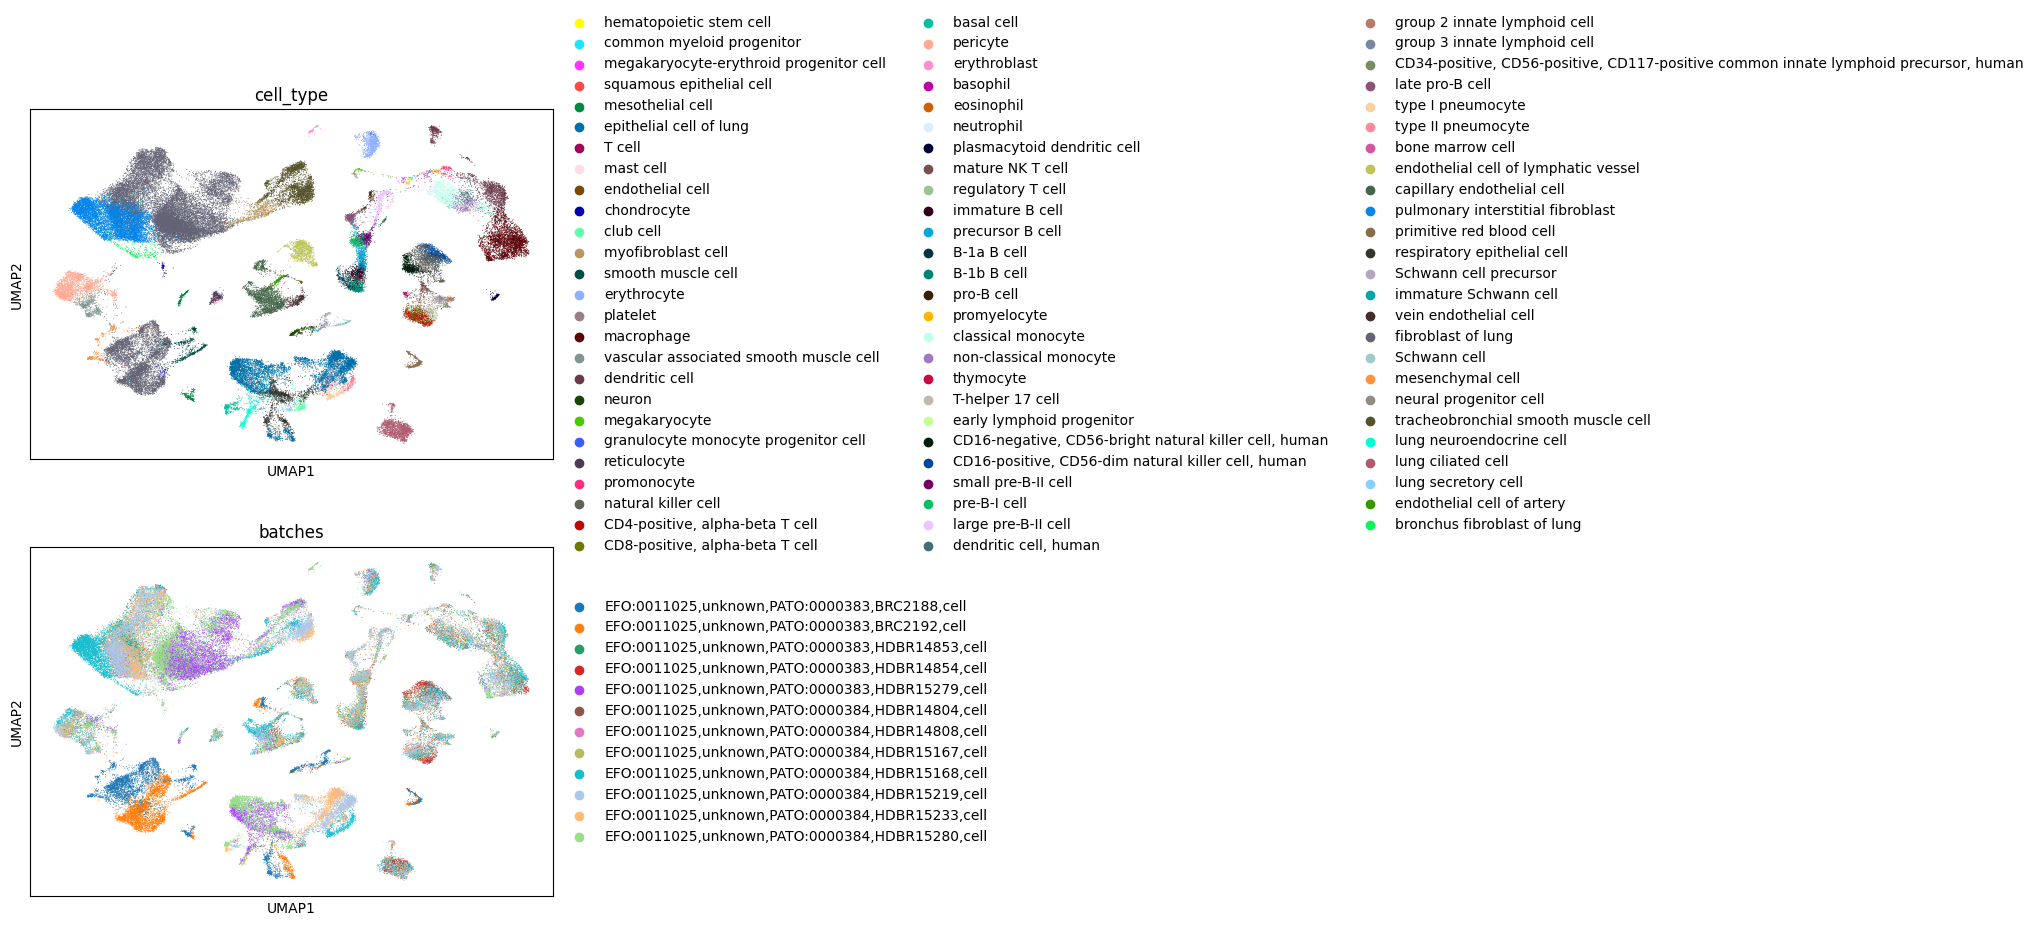

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:359: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  adata.obs.index = [str(uuid4()) for _ in range(adata.shape[0])]


done
AnnData object with n_obs × n_vars = 71752 × 70704
    obs: 'batch', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'broad_celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_tot

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:182: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["nnz"] = np.array(np.sum(adata.X != 0, axis=1).flatten())[0]


filtered out 0 cells, 4636 renamining
Removed 1 genes.
validating


/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:254: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata, organism=adata.obs.organism_ontology_term_id[0], need_all=False


startin QC
Seeing 1852 outliers (39.95% of total dataset):
normalize


/home/ml4ig1/Documents code/scPRINT/scprint2/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


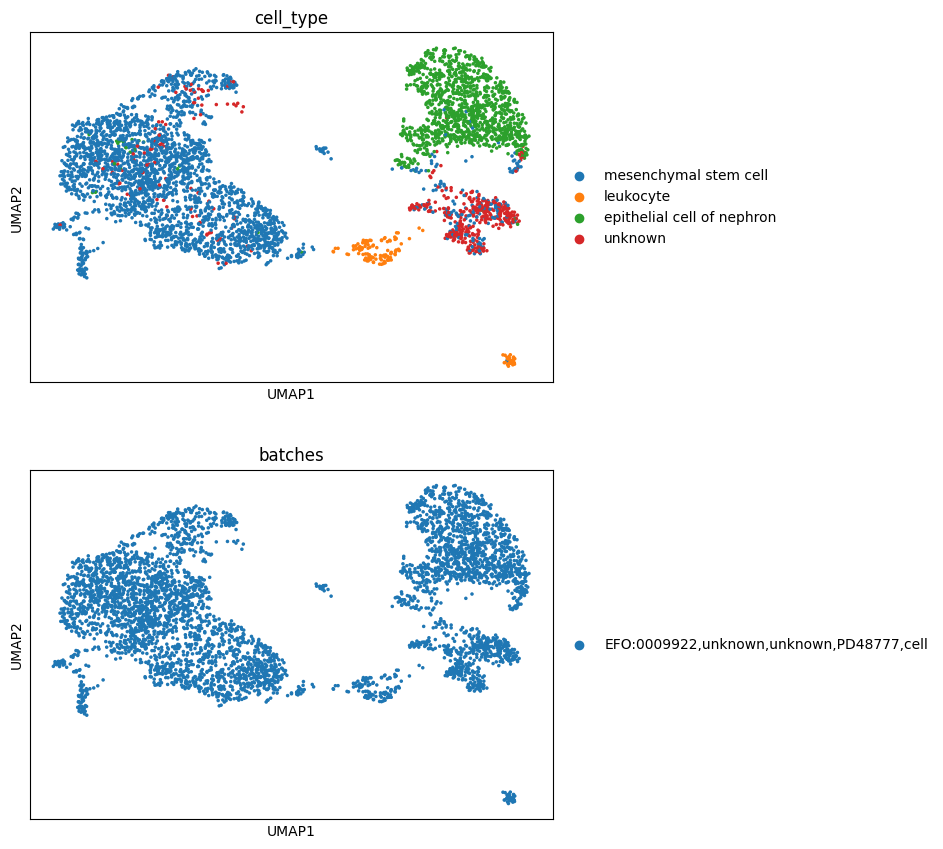

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:359: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  adata.obs.index = [str(uuid4()) for _ in range(adata.shape[0])]


done
AnnData object with n_obs × n_vars = 4636 × 70704
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'mtFrac', 'age', 'CnT', 'DTLH', 'UBCD', 'SSBpr', 'End', 'MSC', 'RVCSB', 'SSBpod', 'SSBm.d', 'ICa', 'ErPrT', 'ICb', 'NPC', 'Pod', 'author_cell_type', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'assay_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'cell_culture', 'nnz', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_count

,uid,key,description,suffix,type,size,hash,n_objects,n_observations,_hash_type,_accessor,visibility,_key_is_virtual,storage_id,transform_id,version,is_latest,run_id,created_at,created_by_id
id,,,,,,,,,,,,,,,,,,,,
17,GcVBvpW5MYlrsH1izOjO,cell-census/2024-07-01/h5ads/3dc61ca1-ce40-46b...,file for scprint v2 test datasets p0,.h5ad,dataset,3290691696,x4o9YBsSEE492pXODPC9tw,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:13.396800+00:00,1


2
Artifact(uid='tggrprv4cllqGOrH8RlL', version='2024-07-01', is_latest=True, key='cell-census/2024-07-01/h5ads/7d3ab174-e433-40fc-a352-6fe71b1a19f9.h5ad', description='Dissection: Amygdaloid complex (AMY) - Basolateral nuclear group (BLN) - lateral nucleus - La', suffix='.h5ad', type='dataset', size=330480233, hash='eS_gAyJD_P0oLd6IHEsPJQ', n_observations=28984, _hash_type='md5-n', _accessor='AnnData', visibility=1, _key_is_virtual=False, storage_id=2, transform_id=1, run_id=1, created_by_id=1, created_at=2024-11-26 15:52:44 UTC)
! run input wasn't tracked, call `ln.track()` and re-run
AnnData object with n_obs × n_vars = 28984 × 59236
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_i

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:182: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["nnz"] = np.array(np.sum(adata.X != 0, axis=1).flatten())[0]


filtered out 0 cells, 28984 renamining
Removed 45 genes.
validating


/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:254: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata, organism=adata.obs.organism_ontology_term_id[0], need_all=False


startin QC
Seeing 6735 outliers (23.24% of total dataset):
normalize


/home/ml4ig1/Documents code/scPRINT/scprint2/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


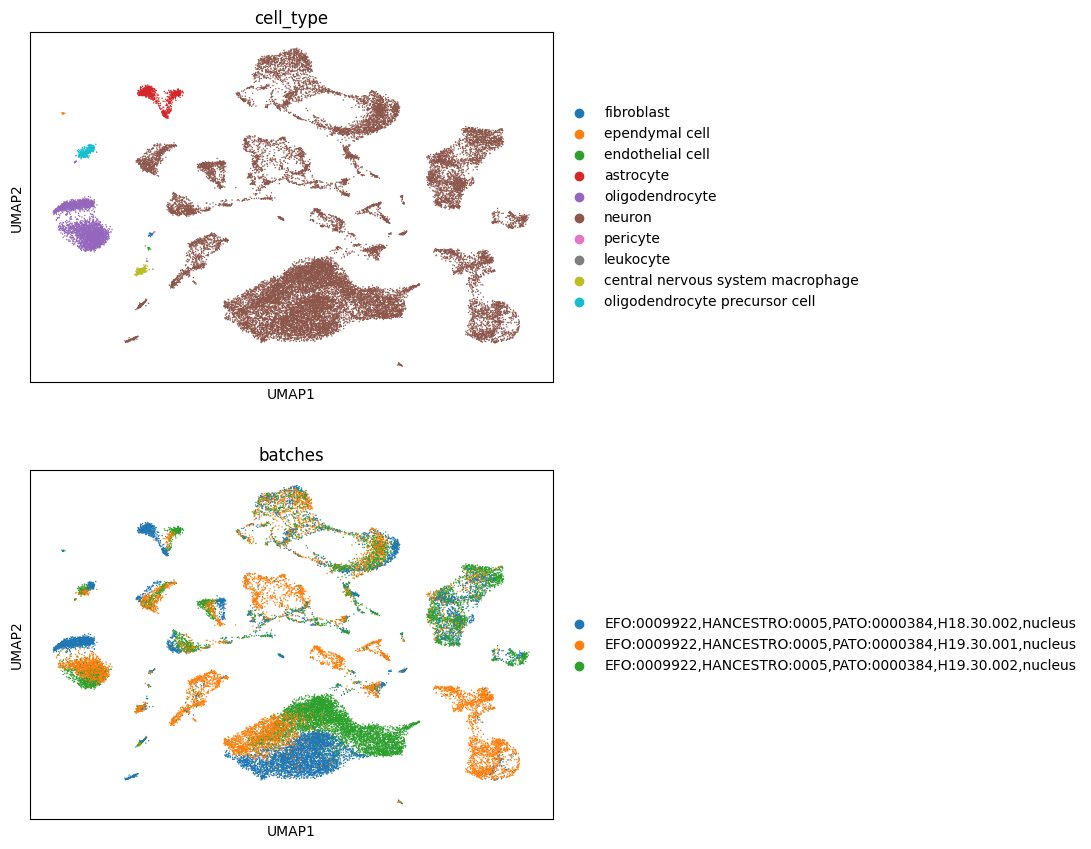

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:359: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  adata.obs.index = [str(uuid4()) for _ in range(adata.shape[0])]


done
AnnData object with n_obs × n_vars = 28984 × 70704
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'cell_culture', 'nnz', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 

,uid,key,description,suffix,type,size,hash,n_objects,n_observations,_hash_type,_accessor,visibility,_key_is_virtual,storage_id,transform_id,version,is_latest,run_id,created_at,created_by_id
id,,,,,,,,,,,,,,,,,,,,
17,GcVBvpW5MYlrsH1izOjO,cell-census/2024-07-01/h5ads/3dc61ca1-ce40-46b...,file for scprint v2 test datasets p0,.h5ad,dataset,3290691696,x4o9YBsSEE492pXODPC9tw,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:13.396800+00:00,1
18,1AeEHLQzGyRZL5nwpffv,cell-census/2024-07-01/h5ads/ea01c125-67a7-4bd...,file for scprint v2 test datasets p1,.h5ad,dataset,260792392,x7gbFGBbyWG6ls6b8tOpo3,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:36.653393+00:00,1


3
Artifact(uid='RCzyhZz9tfi6YI4F7mxb', version='2024-07-01', is_latest=True, key='cell-census/2024-07-01/h5ads/99950e99-2758-41d2-b2c9-643edcdf6d82.h5ad', description='Single cell RNA sequencing of follicular lymphoma', suffix='.h5ad', type='dataset', size=749041844, hash='FaUU0Z0Uk6w2oewwJq8zZg', n_observations=137147, _hash_type='md5-n', _accessor='AnnData', visibility=1, _key_is_virtual=False, storage_id=2, transform_id=1, run_id=1, created_by_id=1, created_at=2024-11-26 15:56:31 UTC)
! run input wasn't tracked, call `ln.track()` and re-run
AnnData object with n_obs × n_vars = 137147 × 30867
    obs: 'sample_id', 'nCount_RNA', 'nFeature_RNA', 'Ratio.RP', 'Ratio.MT', 'cell_type_in_paper', 'TCR/BCR', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'cell_type_ontology_term_id', 'is_primary_data', 'donor_id', 'suspension_

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:182: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["nnz"] = np.array(np.sum(adata.X != 0, axis=1).flatten())[0]


filtered out 0 cells, 137147 renamining
Removed 0 genes.
validating


/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:254: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata, organism=adata.obs.organism_ontology_term_id[0], need_all=False


startin QC
Seeing 33569 outliers (24.48% of total dataset):
normalize


/home/ml4ig1/Documents code/scPRINT/scprint2/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


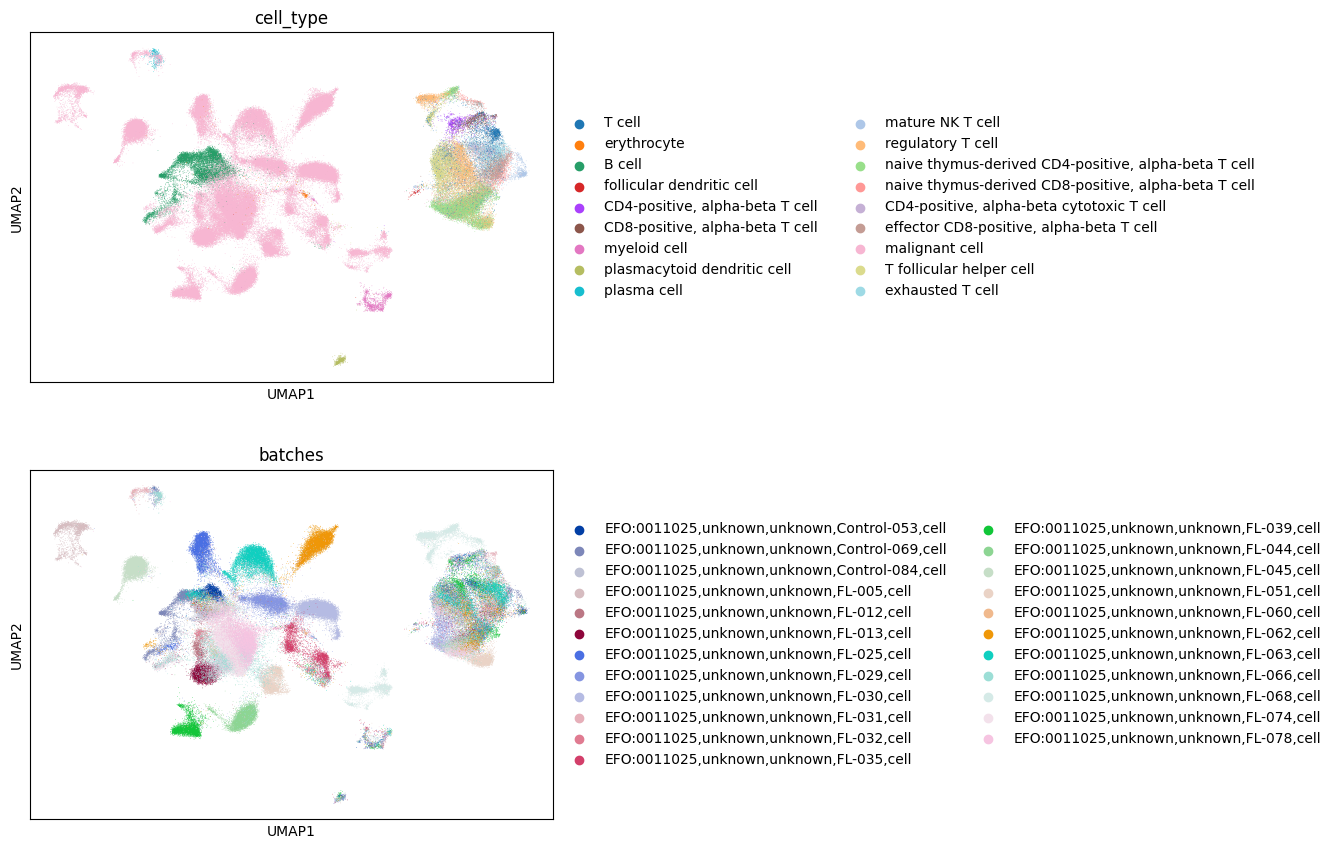

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:359: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  adata.obs.index = [str(uuid4()) for _ in range(adata.shape[0])]


done
AnnData object with n_obs × n_vars = 137147 × 70704
    obs: 'sample_id', 'nCount_RNA', 'nFeature_RNA', 'Ratio.RP', 'Ratio.MT', 'cell_type_in_paper', 'TCR/BCR', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'cell_type_ontology_term_id', 'is_primary_data', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'cell_culture', 'nnz', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'batches', 'lei

,uid,key,description,suffix,type,size,hash,n_objects,n_observations,_hash_type,_accessor,visibility,_key_is_virtual,storage_id,transform_id,version,is_latest,run_id,created_at,created_by_id
id,,,,,,,,,,,,,,,,,,,,
17,GcVBvpW5MYlrsH1izOjO,cell-census/2024-07-01/h5ads/3dc61ca1-ce40-46b...,file for scprint v2 test datasets p0,.h5ad,dataset,3290691696,x4o9YBsSEE492pXODPC9tw,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:13.396800+00:00,1
18,1AeEHLQzGyRZL5nwpffv,cell-census/2024-07-01/h5ads/ea01c125-67a7-4bd...,file for scprint v2 test datasets p1,.h5ad,dataset,260792392,x7gbFGBbyWG6ls6b8tOpo3,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:36.653393+00:00,1
19,tggrprv4cllqGOrH8RlM,cell-census/2024-07-01/h5ads/7d3ab174-e433-40f...,file for scprint v2 test datasets p2,.h5ad,dataset,2377538576,kK9iSU_Wf8hDhHIFSPWsOK,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:03:24.141603+00:00,1


4
Artifact(uid='xXfrauwVrb5LDn6R6YNL', version='2024-07-01', is_latest=True, key='cell-census/2024-07-01/h5ads/f156606a-dd9a-49fd-bc40-0e069b6cf07c.h5ad', description='49 years old male - Airway Wash (2 days post-intubation)', suffix='.h5ad', type='dataset', size=79230763, hash='iR1cv_yegRzGO1LNQMGtfA', n_observations=9852, _hash_type='md5-n', _accessor='AnnData', visibility=1, _key_is_virtual=False, storage_id=2, transform_id=1, run_id=1, created_by_id=1, created_at=2024-11-26 15:58:24 UTC)
! run input wasn't tracked, call `ln.track()` and re-run
AnnData object with n_obs × n_vars = 9852 × 33155
    obs: 'donor_id', 'author_cell_type', 'days_post_intubation', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease',

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:182: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["nnz"] = np.array(np.sum(adata.X != 0, axis=1).flatten())[0]


filtered out 1 cells, 9851 renamining
Removed 14 genes.
validating


/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:254: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata, organism=adata.obs.organism_ontology_term_id[0], need_all=False


startin QC
Seeing 3908 outliers (39.67% of total dataset):
normalize


/home/ml4ig1/Documents code/scPRINT/scprint2/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


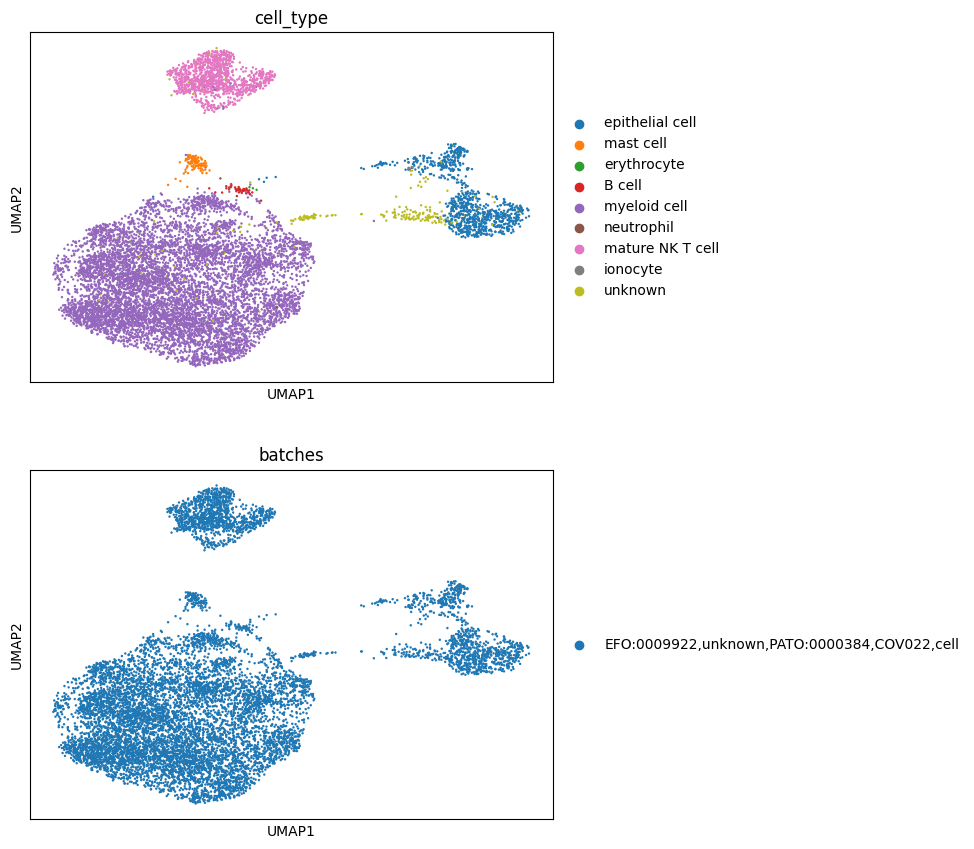

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:359: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  adata.obs.index = [str(uuid4()) for _ in range(adata.shape[0])]


done
AnnData object with n_obs × n_vars = 9851 × 70704
    obs: 'donor_id', 'author_cell_type', 'days_post_intubation', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'cell_culture', 'nnz', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'batches', 'leiden_2', 'leiden_1', 'leiden_0.5', 'clust_cell_type', 'simp

,uid,key,description,suffix,type,size,hash,n_objects,n_observations,_hash_type,_accessor,visibility,_key_is_virtual,storage_id,transform_id,version,is_latest,run_id,created_at,created_by_id
id,,,,,,,,,,,,,,,,,,,,
17,GcVBvpW5MYlrsH1izOjO,cell-census/2024-07-01/h5ads/3dc61ca1-ce40-46b...,file for scprint v2 test datasets p0,.h5ad,dataset,3290691696,x4o9YBsSEE492pXODPC9tw,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:13.396800+00:00,1
18,1AeEHLQzGyRZL5nwpffv,cell-census/2024-07-01/h5ads/ea01c125-67a7-4bd...,file for scprint v2 test datasets p1,.h5ad,dataset,260792392,x7gbFGBbyWG6ls6b8tOpo3,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:36.653393+00:00,1
19,tggrprv4cllqGOrH8RlM,cell-census/2024-07-01/h5ads/7d3ab174-e433-40f...,file for scprint v2 test datasets p2,.h5ad,dataset,2377538576,kK9iSU_Wf8hDhHIFSPWsOK,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:03:24.141603+00:00,1


5
Artifact(uid='J7Ni7YzRM9R94RhmShk0', version='2024-07-01', is_latest=True, key='cell-census/2024-07-01/h5ads/fe4b89d5-461e-440c-a5a8-621b37b122c0.h5ad', description='TI epithelial', suffix='.h5ad', type='dataset', size=938253823, hash='dtbgyvXPKfqLIiB7uQEh-A', n_observations=154136, _hash_type='md5-n', _accessor='AnnData', visibility=1, _key_is_virtual=False, storage_id=2, transform_id=1, run_id=1, created_by_id=1, created_at=2024-11-26 16:02:14 UTC)
! run input wasn't tracked, call `ln.track()` and re-run
AnnData object with n_obs × n_vars = 154136 × 27517
    obs: 'biosample_id', 'n_genes', 'n_counts', 'Type', 'donor_id', 'Layer', 'Celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'age group', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:182: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["nnz"] = np.array(np.sum(adata.X != 0, axis=1).flatten())[0]


filtered out 267 cells, 153869 renamining
Removed 0 genes.
validating


/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:254: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata, organism=adata.obs.organism_ontology_term_id[0], need_all=False


startin QC
Seeing 137181 outliers (89.15% of total dataset):
normalize


/home/ml4ig1/Documents code/scPRINT/scprint2/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


retrying with span


/home/ml4ig1/Documents code/scPRINT/scprint2/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


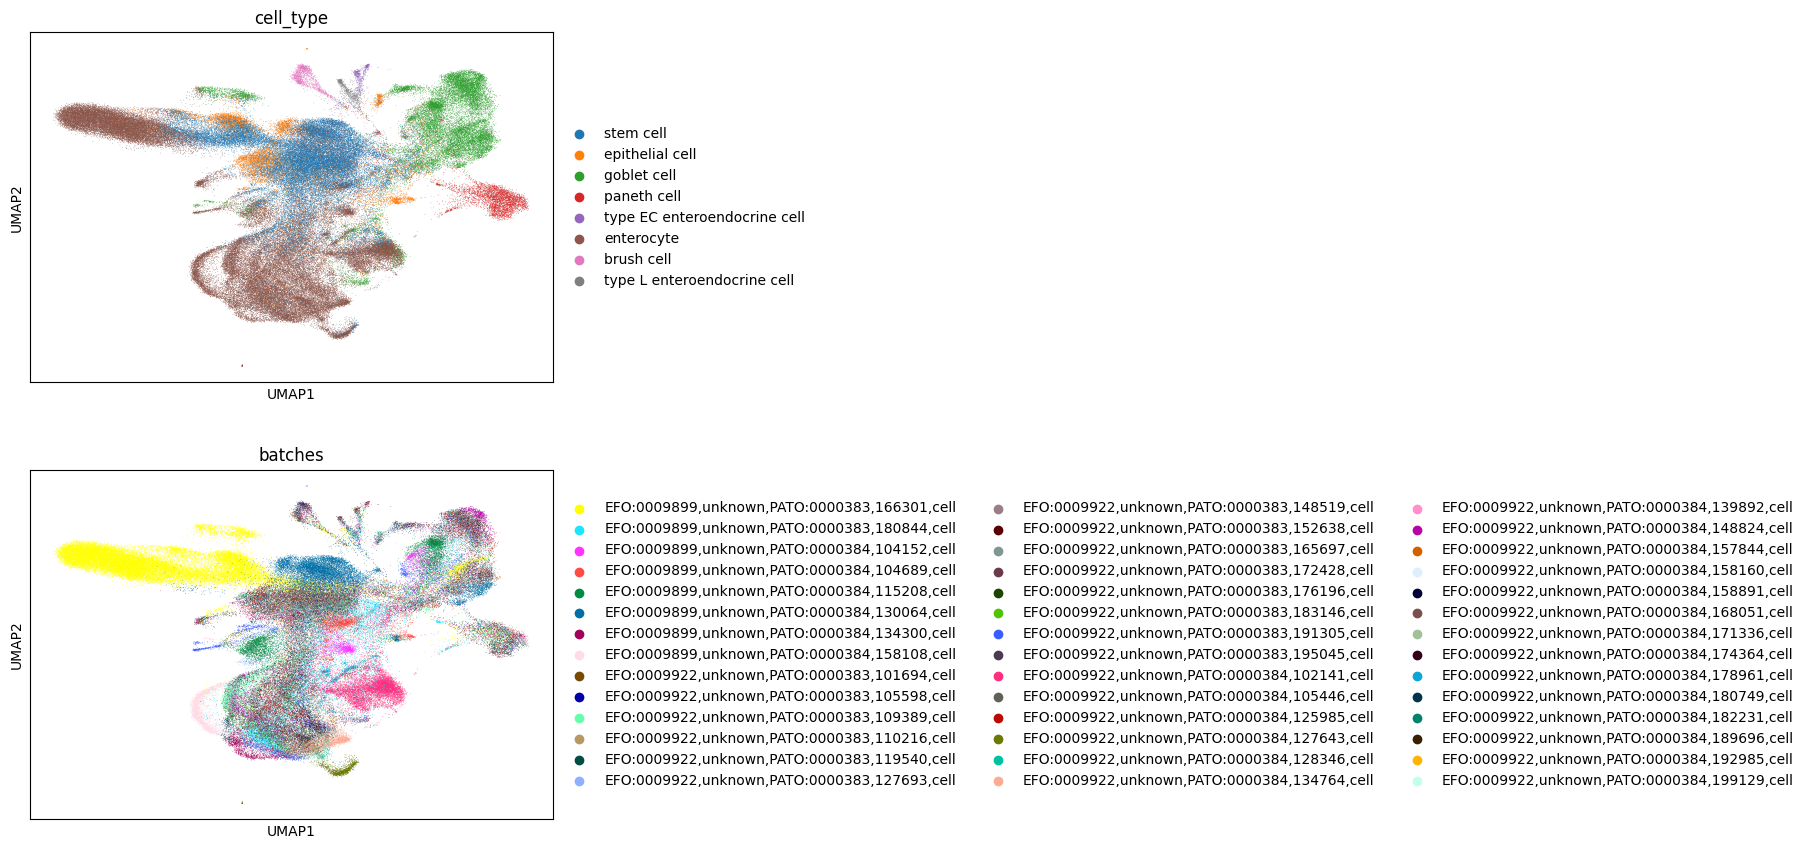

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:359: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  adata.obs.index = [str(uuid4()) for _ in range(adata.shape[0])]


done
AnnData object with n_obs × n_vars = 153869 × 70704
    obs: 'biosample_id', 'n_genes', 'n_counts', 'Type', 'donor_id', 'Layer', 'Celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'age group', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'batches', 'leiden_2', 'leiden_1', 'leiden_0.5', 'clust_c

,uid,key,description,suffix,type,size,hash,n_objects,n_observations,_hash_type,_accessor,visibility,_key_is_virtual,storage_id,transform_id,version,is_latest,run_id,created_at,created_by_id
id,,,,,,,,,,,,,,,,,,,,
17,GcVBvpW5MYlrsH1izOjO,cell-census/2024-07-01/h5ads/3dc61ca1-ce40-46b...,file for scprint v2 test datasets p0,.h5ad,dataset,3290691696,x4o9YBsSEE492pXODPC9tw,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:13.396800+00:00,1
18,1AeEHLQzGyRZL5nwpffv,cell-census/2024-07-01/h5ads/ea01c125-67a7-4bd...,file for scprint v2 test datasets p1,.h5ad,dataset,260792392,x7gbFGBbyWG6ls6b8tOpo3,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:36.653393+00:00,1
19,tggrprv4cllqGOrH8RlM,cell-census/2024-07-01/h5ads/7d3ab174-e433-40f...,file for scprint v2 test datasets p2,.h5ad,dataset,2377538576,kK9iSU_Wf8hDhHIFSPWsOK,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:03:24.141603+00:00,1


6
Artifact(uid='ubrY2slK4QErNBLrA9vl', version='2024-07-01', is_latest=True, key='cell-census/2024-07-01/h5ads/124744b8-4681-474a-9894-683896122708.h5ad', description='Single-cell transcriptomes of the human skin reveal age-related loss of fibroblast priming', suffix='.h5ad', type='dataset', size=100059373, hash='KYlqfMrBy8byjAnGw0OLsg', n_observations=15457, _hash_type='md5-n', _accessor='AnnData', visibility=1, _key_is_virtual=False, storage_id=2, transform_id=1, run_id=1, created_by_id=1, created_at=2024-11-26 16:06:06 UTC)
! run input wasn't tracked, call `ln.track()` and re-run
AnnData object with n_obs × n_vars = 15457 × 30867
    obs: 'age', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'donor_id', 'suspension_type', 'Cluster', 'Celltype', 'tissue_type', 'cell_typ

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:182: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["nnz"] = np.array(np.sum(adata.X != 0, axis=1).flatten())[0]


filtered out 165 cells, 15292 renamining
Removed 0 genes.
validating


/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:254: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata, organism=adata.obs.organism_ontology_term_id[0], need_all=False


startin QC
Seeing 2118 outliers (13.85% of total dataset):
normalize


/home/ml4ig1/Documents code/scPRINT/scprint2/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


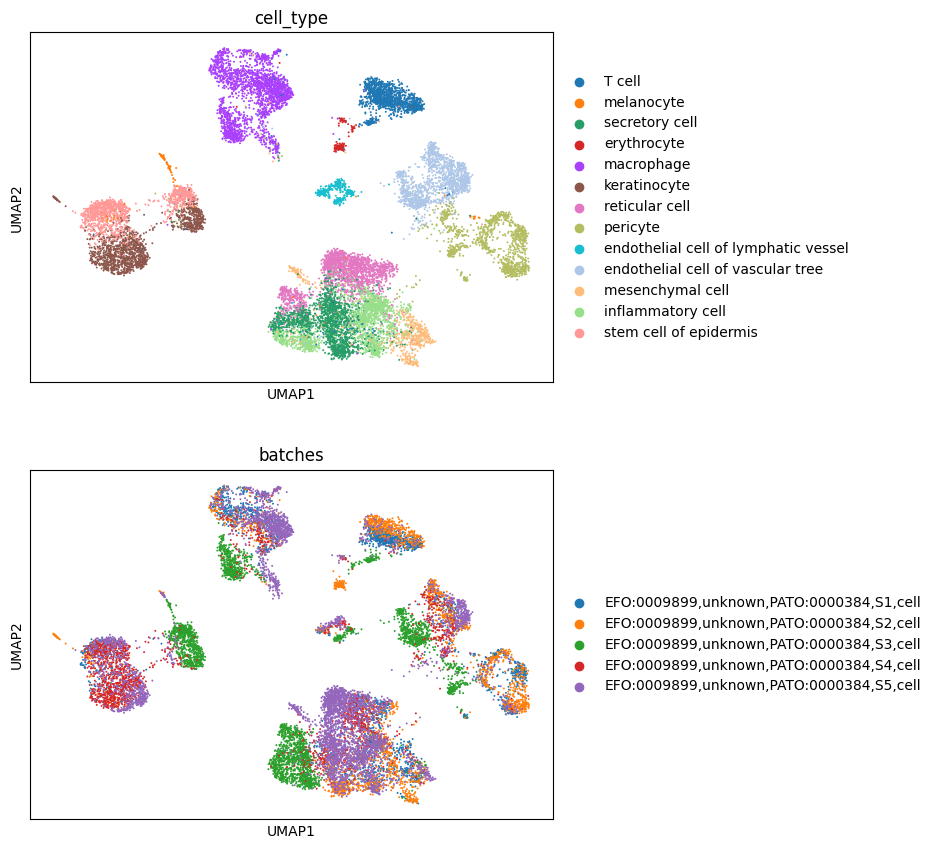

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:359: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  adata.obs.index = [str(uuid4()) for _ in range(adata.shape[0])]


done
AnnData object with n_obs × n_vars = 15292 × 70704
    obs: 'age', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'donor_id', 'suspension_type', 'Cluster', 'Celltype', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'cell_culture', 'nnz', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'batches', 'leiden_2', 'leiden_1', 'leiden_0.5', 'clust_cell_type', 'simplified_dev_st

,uid,key,description,suffix,type,size,hash,n_objects,n_observations,_hash_type,_accessor,visibility,_key_is_virtual,storage_id,transform_id,version,is_latest,run_id,created_at,created_by_id
id,,,,,,,,,,,,,,,,,,,,
17,GcVBvpW5MYlrsH1izOjO,cell-census/2024-07-01/h5ads/3dc61ca1-ce40-46b...,file for scprint v2 test datasets p0,.h5ad,dataset,3290691696,x4o9YBsSEE492pXODPC9tw,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:13.396800+00:00,1
18,1AeEHLQzGyRZL5nwpffv,cell-census/2024-07-01/h5ads/ea01c125-67a7-4bd...,file for scprint v2 test datasets p1,.h5ad,dataset,260792392,x7gbFGBbyWG6ls6b8tOpo3,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:36.653393+00:00,1
19,tggrprv4cllqGOrH8RlM,cell-census/2024-07-01/h5ads/7d3ab174-e433-40f...,file for scprint v2 test datasets p2,.h5ad,dataset,2377538576,kK9iSU_Wf8hDhHIFSPWsOK,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:03:24.141603+00:00,1


7
Artifact(uid='PmoXNMJE1Z7iZBUfE5xb', version='2024-07-01', is_latest=True, key='cell-census/2024-07-01/h5ads/b550fd94-97e0-42e2-90f7-7434781ea2f8.h5ad', description='Macrophage cells from human healthy donor liver samples', suffix='.h5ad', type='dataset', size=79731564, hash='n2d3_8iOtsPGkkXykxPj_g', n_observations=11127, _hash_type='md5-n', _accessor='AnnData', visibility=1, _key_is_virtual=False, storage_id=2, transform_id=1, run_id=1, created_by_id=1, created_at=2024-11-26 16:07:59 UTC)
! run input wasn't tracked, call `ln.track()` and re-run
AnnData object with n_obs × n_vars = 11127 × 33363
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'donor_age', 'self_reported_ethnicity_ontology_term_id', 'donor_cause_of_death', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'tissu

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:182: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["nnz"] = np.array(np.sum(adata.X != 0, axis=1).flatten())[0]


filtered out 0 cells, 9515 renamining
Removed 4 genes.
validating


/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:254: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata, organism=adata.obs.organism_ontology_term_id[0], need_all=False


startin QC
Seeing 6575 outliers (69.10% of total dataset):
normalize


/home/ml4ig1/Documents code/scPRINT/scprint2/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


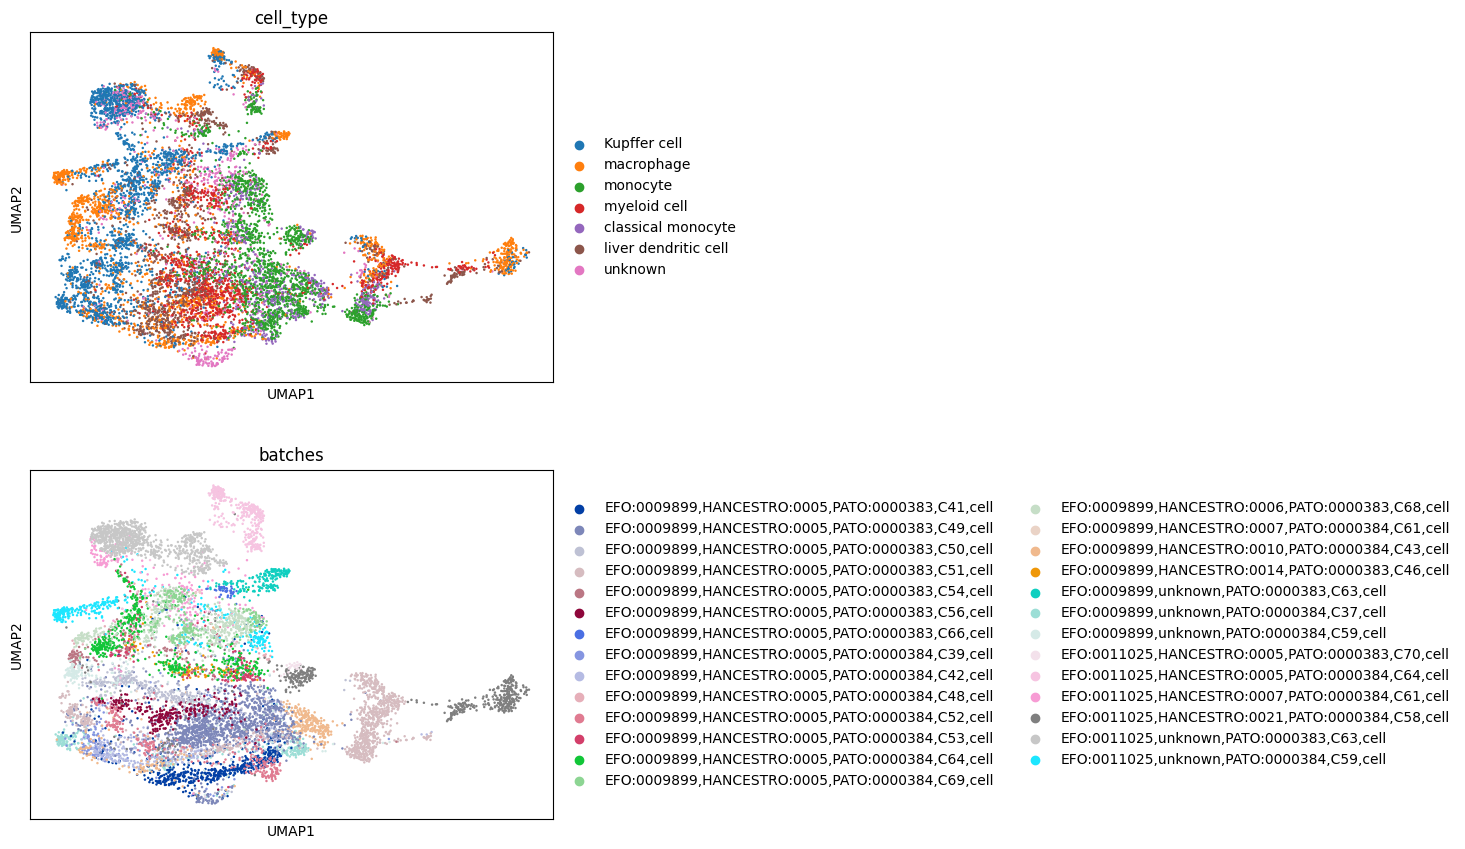

/home/ml4ig1/Documents code/scDataLoader/scdataloader/preprocess.py:359: ImplicitModificationWarning: Trying to modify index of attribute `.obs` of view, initializing view as actual.
  adata.obs.index = [str(uuid4()) for _ in range(adata.shape[0])]


done
AnnData object with n_obs × n_vars = 9515 × 70704
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'donor_age', 'self_reported_ethnicity_ontology_term_id', 'donor_cause_of_death', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'tissue_type', 'suspension_depleted_cell_types', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_uuid', 'suspension_type', 'tissue_handling_interval', 'library_uuid', 'assay_ontology_term_id', 'library_starting_quantity', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'Phase', 'Coarse_clusters', 'sample', 'cell_type', 'assay', 'disease', 'organism',

,uid,key,description,suffix,type,size,hash,n_objects,n_observations,_hash_type,_accessor,visibility,_key_is_virtual,storage_id,transform_id,version,is_latest,run_id,created_at,created_by_id
id,,,,,,,,,,,,,,,,,,,,
17,GcVBvpW5MYlrsH1izOjO,cell-census/2024-07-01/h5ads/3dc61ca1-ce40-46b...,file for scprint v2 test datasets p0,.h5ad,dataset,3290691696,x4o9YBsSEE492pXODPC9tw,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:13.396800+00:00,1
18,1AeEHLQzGyRZL5nwpffv,cell-census/2024-07-01/h5ads/ea01c125-67a7-4bd...,file for scprint v2 test datasets p1,.h5ad,dataset,260792392,x7gbFGBbyWG6ls6b8tOpo3,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:00:36.653393+00:00,1
19,tggrprv4cllqGOrH8RlM,cell-census/2024-07-01/h5ads/7d3ab174-e433-40f...,file for scprint v2 test datasets p2,.h5ad,dataset,2377538576,kK9iSU_Wf8hDhHIFSPWsOK,None,None,sha1-fl,AnnData,1,True,1,None,2,True,None,2024-12-10 08:03:24.141603+00:00,1


! no run & transform got linked, call `ln.track()` & re-run
! run input wasn't tracked, call `ln.track()` and re-run


In [23]:
preprocessed_dataset = do_preprocess(col, name="scPRINT-V2 test", description="file for scprint v2 test datasets", start_at=0, version="2")

In [25]:
preprocessed_dataset

Collection(uid='CRlY3kwz2SqvGRrD0000', is_latest=True, name='scPRINT-V2 test', description='file for scprint v2 test datasets', hash='x-UmrzL_m4tA2NwhS95t_g', visibility=1, created_by_id=1, created_at=2024-12-10 08:27:25 UTC)

In [8]:
col = ln.Collection(list(ln.Artifact.filter(version="2")), name="scPRINT-V2 test")
col.save()
col


! no run & transform got linked, call `ln.track()` & re-run
! run input wasn't tracked, call `ln.track()` and re-run


<QuerySet [Artifact(uid='GcVBvpW5MYlrsH1izOjO', version='2', is_latest=True, description='file for scprint v2 test datasets p0', key='cell-census/2024-07-01/h5ads/3dc61ca1-ce40-46b6-8337-f27260fd9a03.h5ad', suffix='.h5ad', type='dataset', size=345561276, hash='wVnOAZQ3MNvcaXEhZWqfiZ', _hash_type='sha1-fl', _accessor='AnnData', visibility=1, _key_is_virtual=True, storage_id=1, created_by_id=1, created_at=2024-11-26 17:03:35 UTC), Artifact(uid='1AeEHLQzGyRZL5nwpffv', version='2', is_latest=True, description='file for scprint v2 test datasets p1', key='cell-census/2024-07-01/h5ads/ea01c125-67a7-4bd3-a8b0-e1b53a011b7e.h5ad', suffix='.h5ad', type='dataset', size=29708367, hash='h6alZ0MTI2lvugH2ZXaLqw', _hash_type='md5', _accessor='AnnData', visibility=1, _key_is_virtual=True, storage_id=1, created_by_id=1, created_at=2024-11-26 17:04:26 UTC), Artifact(uid='tggrprv4cllqGOrH8RlM', version='2', is_latest=True, description='file for scprint v2 test datasets p2', key='cell-census/2024-07-01/h5ad

In [ ]:
import scdataloader

In [32]:
col = ln.Collection(ln.Artifact.filter(description__startswith="file for scPRINT"), name="scPRINT-V2 test", description="file for scprint v2 test datasets")


! no run & transform got linked, call `ln.track()` & re-run
! run input wasn't tracked, call `ln.track()` and re-run


Collection(uid='fdQiS05enDO2uWAZ0000', is_latest=True, name='scPRINT-V2 test', description='file for scprint v2 test datasets', hash='yAXiH-kPnjU-lttbDjv54w', visibility=1, created_by_id=1)

In [54]:
cx_dataset_2.artifacts.filter()[3].open().obs.is_primary_data.sum()

0

In [2]:
from scdataloader.utils import translate
import bionty as bt
import lamindb as ln

In [ ]:
bt.Organism.filter().df()

,uid,name,ontology_id,scientific_name,synonyms,description,source_id,run_id,created_at,created_by_id
id,,,,,,,,,,
1,2AmW7N1E,macaque,NCBITaxon:9544,macaca_mulatta,None,None,5.0,None,2024-11-25 10:54:58.194360+00:00,1
2,3qUn9Zrd,white-tufted-ear marmoset,NCBITaxon:9483,callithrix_jacchus,None,None,5.0,None,2024-11-25 10:54:58.194479+00:00,1
3,3RZqbcSL,mouse,NCBITaxon:10090,mus_musculus,None,None,5.0,None,2024-11-25 10:54:58.194551+00:00,1
4,1dpCL6Td,human,NCBITaxon:9606,homo_sapiens,None,None,5.0,None,2024-11-25 10:54:58.194617+00:00,1
5,5HWRj1OD,unknown,unknown,None,None,None,NaN,None,2024-11-25 10:54:58.221434+00:00,1


In [ ]:
list(bt.DevelopmentalStage.filter(ontology_id="HsapDv:0000023").one().parents.filter())

[DevelopmentalStage(uid='7k1A0zkT', name='life cycle stage', ontology_id='HsapDv:0000000', synonyms='developmental stage', description='A Spatiotemporal Region Encompassing Some Part Of The Life Cycle Of An Organism.', created_by_id=1, source_id=96, created_at=2024-11-25 10:55:13 UTC),
 DevelopmentalStage(uid='3RFqT94o', name='life cycle', ontology_id='HsapDv:0000001', description='Temporal Interval That Defines Human Life From The Prenatal Stage Until Late Adulthood.', created_by_id=1, source_id=96, created_at=2024-11-25 10:55:13 UTC),
 DevelopmentalStage(uid='5prJEXna', name='embryonic stage', ontology_id='HsapDv:0000002', description='Prenatal Stage That Starts With Fertilization And Ends With A Fully Formed Embryo, Before Undergoing Last Development During The Fetal Stage.', created_by_id=1, source_id=96, created_at=2024-11-25 10:55:13 UTC),
 DevelopmentalStage(uid='2hOE3S2f', name='organogenesis stage', ontology_id='HsapDv:0000015', description='Embryonic Stage At Which The Ectode

In [ ]:
translate(['MmusDv:0000021', 'MmusDv:0000024', 'MmusDv:0000026', 'MmusDv:0000027', 'MmusDv:0000028', 'MmusDv:0000029', 'MmusDv:0000032', 'MmusDv:0000033', 'MmusDv:0000034', 'MmusDv:0000035', 'MmusDv:0000036', 'MmusDv:0000037', 'MmusDv:0000046', 'MmusDv:0000048', 'MmusDv:0000049', 'MmusDv:0000050', 'MmusDv:0000051', 'MmusDv:0000052', 'MmusDv:0000053', 'MmusDv:0000054', 'MmusDv:0000055', 'MmusDv:0000056', 'MmusDv:0000057', 'MmusDv:0000058', 'MmusDv:0000059', 'MmusDv:0000061', 'MmusDv:0000062', 'MmusDv:0000063', 'MmusDv:0000064', 'MmusDv:0000065', 'MmusDv:0000066', 'MmusDv:0000067', 'MmusDv:0000068', 'MmusDv:0000070', 'MmusDv:0000071', 'MmusDv:0000072', 'MmusDv:0000073', 'MmusDv:0000074', 'MmusDv:0000077', 'MmusDv:0000079', 'MmusDv:0000087', 'MmusDv:0000089', 'MmusDv:0000091', 'MmusDv:0000098', 'MmusDv:0000099', 'MmusDv:0000102', 'MmusDv:0000110', 'MmusDv:0000113',], t="development_stage_ontology_term_id")

{'MmusDv:0000113': '4-7 days',
 'MmusDv:0000064': '4 month-old stage',
 'MmusDv:0000033': 'Theiler stage 24',
 'MmusDv:0000034': 'Theiler stage 25',
 'MmusDv:0000056': '12 weeks',
 'MmusDv:0000061': 'early adult stage',
 'MmusDv:0000091': '20 month-old stage and over',
 'MmusDv:0000048': '4 weeks',
 'MmusDv:0000074': '24 weeks',
 'MmusDv:0000098': '25 weeks',
 'MmusDv:0000062': '2 month-old stage',
 'MmusDv:0000035': 'Theiler stage 26',
 'MmusDv:0000077': '6 month-old stage',
 'MmusDv:0000066': '17 weeks',
 'MmusDv:0000079': '8 month-old stage',
 'MmusDv:0000028': 'Theiler stage 21',
 'MmusDv:0000099': '26 weeks',
 'MmusDv:0000073': '23 weeks',
 'MmusDv:0000046': '2 weeks',
 'MmusDv:0000024': 'Theiler stage 17',
 'MmusDv:0000050': '6 weeks',
 'MmusDv:0000037': 'Theiler stage 28',
 'MmusDv:0000021': 'Theiler stage 14',
 'MmusDv:0000051': '7 weeks',
 'MmusDv:0000070': '20 weeks',
 'MmusDv:0000059': '15 weeks',
 'MmusDv:0000049': '5 weeks',
 'MmusDv:0000026': 'Theiler stage 19',
 'MmusDv:

In [ ]:
[bt.DevelopmentalStage.filter(name=i, ontology_id__startswith="HsapDv").first().ontology_id for i in ["mature stage", "late adult stage", "60-79 year-old stage", "80 year-old and over stage", "middle aged stage", "young adult stage", "child stage (1-4 yo)", "juvenile stage (5-14 yo)", "infant stage", "newborn stage (0-28 days)", "Carnegie stage 03", "Carnegie stage 04", "Carnegie stage 05", "Carnegie stage 01", "Carnegie stage 02", "gastrula stage", "neurula stage", "organogenesis stage", "fetal stage"]]


['HsapDv:0000204',
 'HsapDv:0000227',
 'HsapDv:0000272',
 'HsapDv:0000095',
 'HsapDv:0000092',
 'HsapDv:0000089',
 'HsapDv:0000265',
 'HsapDv:0000271',
 'HsapDv:0000083',
 'HsapDv:0000262',
 'HsapDv:0000007',
 'HsapDv:0000008',
 'HsapDv:0000009',
 'HsapDv:0000003',
 'HsapDv:0000005',
 'HsapDv:0000010',
 'HsapDv:0000012',
 'HsapDv:0000015',
 'HsapDv:0000037']

In [16]:
arts = ln.Collection.filter(name="scPRINT-V2 test").one().artifacts.filter()

In [22]:
adata = arts[7].load()
adata.obs["simplified_dev_stage"].unique()

! run input wasn't tracked, call `ln.track()` and re-run


['HsapDv:0000087', 'HsapDv:0000091', 'HsapDv:0000088']
Categories (3, object): ['HsapDv:0000087', 'HsapDv:0000088', 'HsapDv:0000091']

In [11]:
adata.obs["development_stage_ontology_term_id"].unique()

['HsapDv:0000136', 'HsapDv:0000144', 'HsapDv:0000123']
Categories (3, object): ['HsapDv:0000123', 'HsapDv:0000136', 'HsapDv:0000144']

In [15]:
adata.obs['simplified_dev_stage'].unique()

NameError: name 'adata' is not defined

In [9]:
adata.write_h5ad(arts[1].path)

In [12]:
bt.DevelopmentalStage.filter(ontology_id='HsapDv:0000123').one().parents.filter().df()

,uid,name,ontology_id,abbr,synonyms,description,source_id,run_id,created_at,created_by_id
id,,,,,,,,,,
1,7k1A0zkT,life cycle stage,HsapDv:0000000,None,developmental stage,A Spatiotemporal Region Encompassing Some Part...,96,None,2024-11-25 10:55:13.334947+00:00,1
2,3RFqT94o,life cycle,HsapDv:0000001,None,None,Temporal Interval That Defines Human Life From...,96,None,2024-11-25 10:55:13.335093+00:00,1
215,3iJoX5E6,prime adult stage,HsapDv:0000226,None,None,A Life Cycle Stage That Starts At Sexual Matur...,96,None,2024-11-25 10:55:13.360198+00:00,1
226,605qZyE4,third decade stage,HsapDv:0000237,None,None,Human Stage That Refers To An Individual Who I...,96,None,2024-11-25 10:55:13.360835+00:00,1
246,lMkvrUmy,adult stage,HsapDv:0000258,None,mature stage,Human Developmental Stage That Refers To A Sex...,96,None,2024-11-25 10:55:13.362012+00:00,1
252,5iEINsnm,young adult stage,HsapDv:0000266,None,None,A Prime Adult Stage That Refers To An Adult Wh...,96,None,2024-11-25 10:55:13.362362+00:00,1
259,7PwM9y8d,postnatal stage,HsapDv:0010000,None,None,Human Developmental Stage That Covers The Whol...,96,None,2024-11-25 10:55:13.362757+00:00,1


In [ ]:
human_mouse_dev_stage_map = {
"HsapDv:0000204": [ # mature stage
  'MmusDv:0000110',#mature stage
  ],
"HsapDv:0000227": [ # late adult stage
  'MmusDv:0000091',#20 month-old stage
  'MmusDv:0000089',#18 month-old stage
  ],
"HsapDv:0000272": [], # 60-79 year-old stage
"HsapDv:0000095": [], # 80 year-old and over stage
"HsapDv:0000092": [ # middle aged stage
  'MmusDv:0000087',#16 month-old stage
  ],
"HsapDv:0000089": [ # young adult stage
  'MmusDv:0000061',#early adult stage
  'MmusDv:0000074',#24 weeks
  'MmusDv:0000098',#25 weeks
  'MmusDv:0000066',#17 weeks
  'MmusDv:0000099',#26 weeks
  'MmusDv:0000073',#23 weeks
  'MmusDv:0000051',#7 weeks
  'MmusDv:0000070',#20 weeks
  'MmusDv:0000059',#15 weeks
  'MmusDv:0000102',#29 weeks
  'MmusDv:0000053',#9 weeks
  'MmusDv:0000072',#22 weeks
  'MmusDv:0000058',#14 weeks
  'MmusDv:0000055',#11 weeks
  'MmusDv:0000068',#19 weeks
  'MmusDv:0000071',#21 weeks
  'MmusDv:0000054',#10 weeks
  'MmusDv:0000057',#13 weeks
  'MmusDv:0000052',#8 weeks
  'MmusDv:0000065',#16 weeks
  'MmusDv:0000067',#18 weeks
  'MmusDv:0000062',#2 month-old stage
  'MmusDv:0000077',#6 month-old stage
  'MmusDv:0000079',#8 month-old stage
  'MmusDv:0000050',#6 weeks
  'MmusDv:0000056',#12 weeks
  'MmusDv:0000063',#3 month-old stage
  'MmusDv:0000064',#4 month-old stage
  ],
"HsapDv:0000265": [], # child stage (1-4 yo)
"HsapDv:0000271": [ # juvenile stage (5-14 yo)
  'MmusDv:0000048',#4 weeks
  'MmusDv:0000049',#5 weeks
  ],
"HsapDv:0000083": [ # infant stage
  'MmusDv:0000046',#2 weeks:[]
  ],
"HsapDv:0000262": [ # newborn stage (0-28 days)
  'MmusDv:0000036',#Theiler stage 27
  'MmusDv:0000037',#Theiler stage 28
  'MmusDv:0000113',#4-7 days
  ],
"HsapDv:0000007": [], # Carnegie stage 03
"HsapDv:0000008": [], # Carnegie stage 04
"HsapDv:0000009": [], # Carnegie stage 05
"HsapDv:0000003": [], # Carnegie stage 01
"HsapDv:0000005": [], # Carnegie stage 02
"HsapDv:0000010": [], # gastrula stage
"HsapDv:0000012": [], # neurula stage
"HsapDv:0000015": [ # organogenesis stage
  'MmusDv:0000021',#Theiler stage 14
  'MmusDv:0000026',#Theiler stage 19
  'MmusDv:0000027',#Theiler stage 20
  'MmusDv:0000028',#Theiler stage 21
  'MmusDv:0000029',#Theiler stage 22
  'MmusDv:0000024',#Theiler stage 17
  ],
"HsapDv:0000037": [ # fetal stage
  'MmusDv:0000033',#Theiler stage 24
  'MmusDv:0000034',#Theiler stage 25
  'MmusDv:0000035',#Theiler stage 26
  'MmusDv:0000032',#Theiler stage 23
  ]
}

In [ ]:
a = set()
for i,v in human_mouse_dev_stage_map.items():
    a.update(v)
len(a)

48

In [ ]:
set(['MmusDv:0000019', 'MmusDv:0000020', 'MmusDv:0000021', 'MmusDv:0000022', 'MmusDv:0000023', 'MmusDv:0000024', 'MmusDv:0000025', 'MmusDv:0000026', 'MmusDv:0000027', 'MmusDv:0000028', 'MmusDv:0000029', 'MmusDv:0000032', 'MmusDv:0000033', 'MmusDv:0000034', 'MmusDv:0000035', 'MmusDv:0000036', 'MmusDv:0000037', 'MmusDv:0000041', 'MmusDv:0000045', 'MmusDv:0000046', 'MmusDv:0000047', 'MmusDv:0000048', 'MmusDv:0000049', 'MmusDv:0000050', 'MmusDv:0000051', 'MmusDv:0000052', 'MmusDv:0000053', 'MmusDv:0000054', 'MmusDv:0000055', 'MmusDv:0000056', 'MmusDv:0000057', 'MmusDv:0000058', 'MmusDv:0000059', 'MmusDv:0000061', 'MmusDv:0000062', 'MmusDv:0000063', 'MmusDv:0000064', 'MmusDv:0000068', 'MmusDv:0000077', 'MmusDv:0000083', 'MmusDv:0000087', 'MmusDv:0000089', 'MmusDv:0000091', 'MmusDv:0000092', 'MmusDv:0000098', 'MmusDv:0000110', 'MmusDv:0000113',])-set(a)

{'MmusDv:0000019',
 'MmusDv:0000020',
 'MmusDv:0000022',
 'MmusDv:0000023',
 'MmusDv:0000025',
 'MmusDv:0000041',
 'MmusDv:0000045',
 'MmusDv:0000047',
 'MmusDv:0000083',
 'MmusDv:0000092'}

In [ ]:
list(ln.Collection.filter())

[Collection(uid='gbemLwcAhnhWPlwt0000', is_latest=True, name='my census subset', description='to run on preprocess', hash='vT3dDLoxRlJQQTFPb6LQ7w', visibility=1, created_by_id=1, created_at=2024-11-26 16:15:19 UTC),
 Collection(uid='fdQiS05enDO2uWAZ0000', is_latest=True, name='scPRINT-V2 test', description='file for scprint v2 test datasets', hash='yAXiH-kPnjU-lttbDjv54w', visibility=1, created_by_id=1, created_at=2024-11-26 17:30:31 UTC)]